<a href="https://colab.research.google.com/github/rohankavari/MachineLearning/blob/main/SVM_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
from sklearn.svm import LinearSVC,SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , roc_curve , auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [4]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [8]:
df.shape

(400, 3)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      400 non-null    float64
 1   X2      400 non-null    float64
 2   Y       400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 12.5 KB


In [5]:
classes=df['Y'].value_counts()
print("class distribution \n","0:",classes[0]/(classes[0]+classes[1]) *100,"%","\n 1:",classes[1]/(classes[0]+classes[1]) *100,"%" )

class distribution 
 0: 50.0 % 
 1: 50.0 %


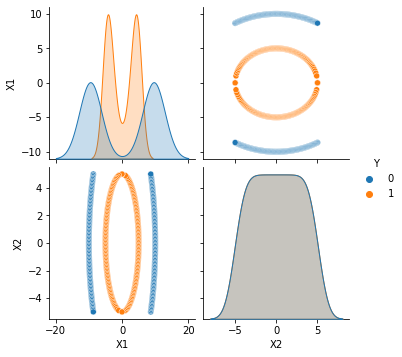

In [7]:
sns.pairplot(data=df, hue="Y")


In [13]:
y=df.iloc[:,2:3].values.ravel()
x=df.iloc[:,0:2]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [19]:
scaler = StandardScaler()
scaler.fit(x_train)
x_sca_train=scaler.transform(x_train)
x_sca_test=scaler.transform(x_test)

In [25]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 plt.legend()

# Model 1

In [20]:
model1=LinearSVC(random_state=0,penalty='l1', loss='squared_hinge', dual=False)    
model1.fit(x_sca_train,y_train)
y_pred=model1.predict(x_sca_train)

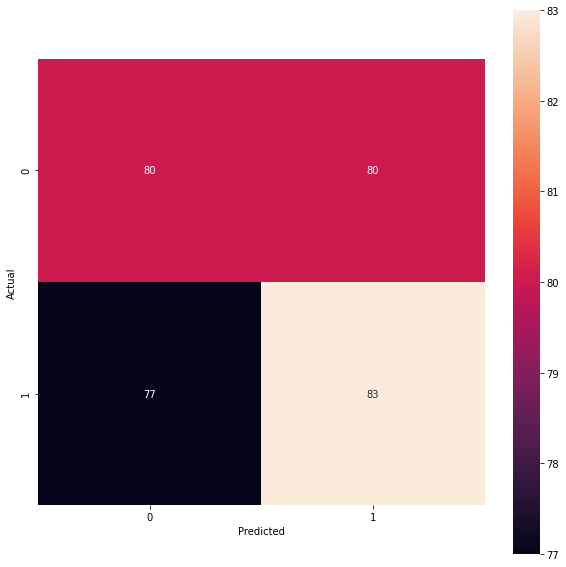

In [21]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [22]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50       160
           1       0.51      0.52      0.51       160

    accuracy                           0.51       320
   macro avg       0.51      0.51      0.51       320
weighted avg       0.51      0.51      0.51       320



In [23]:
from sklearn.model_selection import cross_val_score
print("Cross Val Score:",cross_val_score(model1, x_sca_train, y_train, cv=3,scoring='f1'))
print("Cross Val Mean:",np.round(np.mean(cross_val_score(model1, x_sca_train, y_train, cv=3,scoring='f1')),10))
print("Cross Val Std:",np.round(np.std(cross_val_score(model1, x_sca_train, y_train, cv=3,scoring='f1')),10))

Cross Val Score: [0.40776699 0.46728972 0.4587156 ]
Cross Val Mean: 0.4445907687
Cross Val Std: 0.0262725699


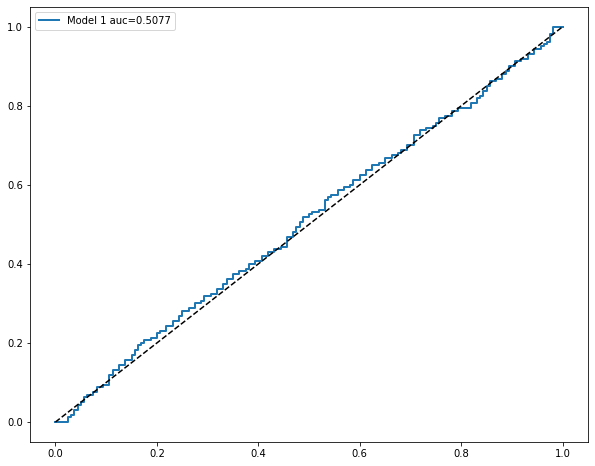

In [26]:
scores=model1.decision_function(x_sca_train)
fpr, tpr, thresholds = roc_curve(y_train, scores)
area=str(np.round(auc(fpr,tpr),5))
plt.figure(figsize = (10,8))
plot_roc_curve(fpr,tpr,"Model 1"+" auc="+area)

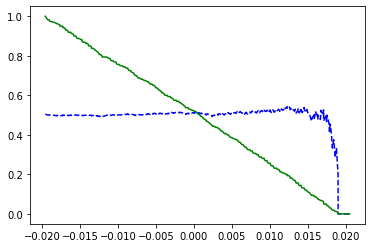

In [27]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [33]:
y_train

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

# Model 2

In [34]:
model2=SVC(cache_size=1000)

In [35]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              "gamma":["scale",'auto'],
              "degree":[2,3,4]
              } 
grid = GridSearchCV(model2, param_grid, refit = True, verbose = 7,scoring="f1", cv=10, n_jobs=-1)
grid.fit(x_sca_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1180 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   12.9s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=1000,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=7)

In [36]:
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 1.0 with param: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [39]:
model2=SVC(C=0.1, degree=2, gamma= 'scale', kernel='poly')
model2.fit(x_sca_train, y_train)
y_pred=model2.predict(x_sca_train)

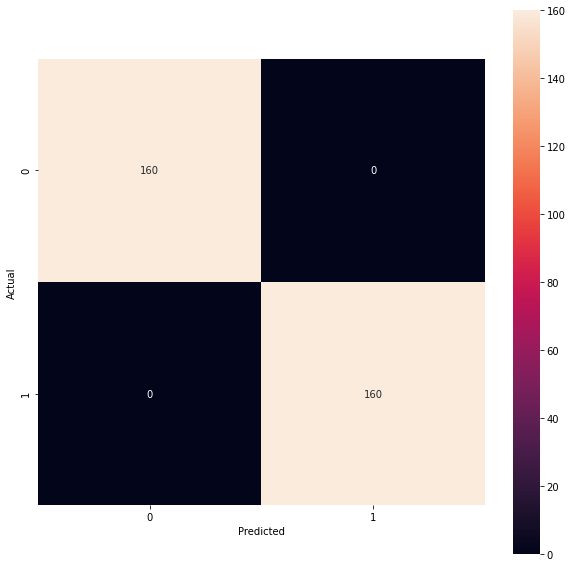

In [40]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [41]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       160

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [44]:
from sklearn.model_selection import cross_val_score
print("Cross Val Score:",cross_val_score(model2, x_sca_train, y_train, cv=3,scoring='f1'))
print("Cross Val Mean:",np.round(np.mean(cross_val_score(model2, x_sca_train, y_train, cv=3,scoring='f1')),10))
print("Cross Val Std:",np.round(np.std(cross_val_score(model2, x_sca_train, y_train, cv=3,scoring='f1')),10))

Cross Val Score: [1. 1. 1.]
Cross Val Mean: 1.0
Cross Val Std: 0.0


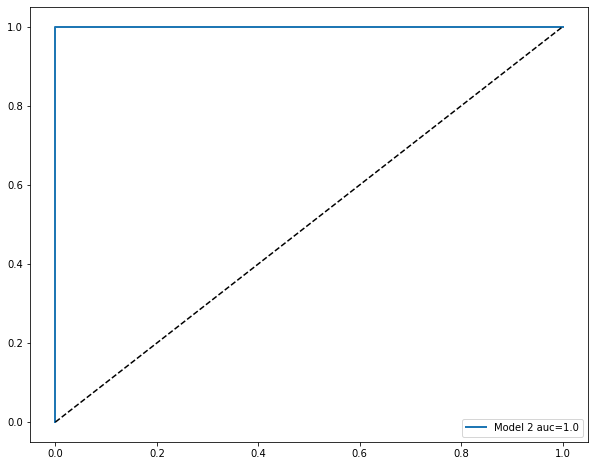

In [53]:
scores=model2.decision_function(x_sca_train)
fpr, tpr, thresholds = roc_curve(y_train, scores)
area=str(np.round(auc(fpr,tpr),5))
plt.figure(figsize = (10,8))
plot_roc_curve(fpr,tpr,"Model 2"+" auc="+area)

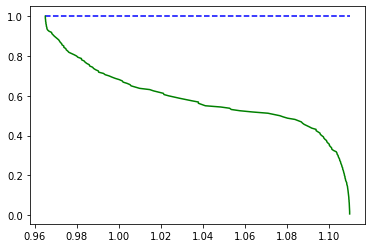

In [47]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

Model Eval

In [48]:
pred_mod1=model1.predict(x_sca_test)
pred_mod2=model2.predict(x_sca_test)


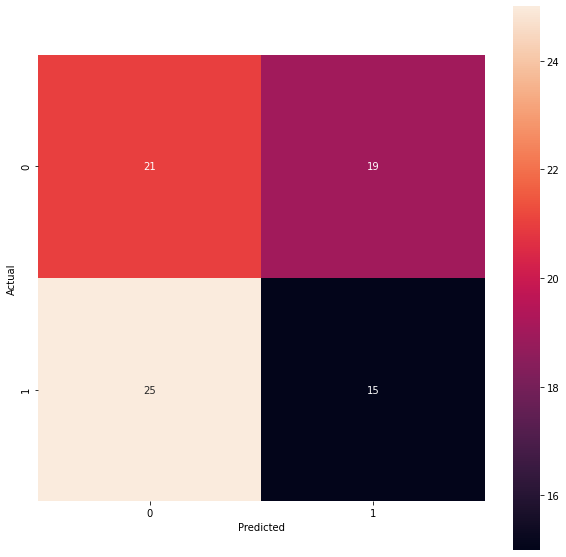

In [49]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_test, pred_mod1),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [50]:
print(metrics.classification_report(y_test, pred_mod1))

              precision    recall  f1-score   support

           0       0.46      0.53      0.49        40
           1       0.44      0.38      0.41        40

    accuracy                           0.45        80
   macro avg       0.45      0.45      0.45        80
weighted avg       0.45      0.45      0.45        80



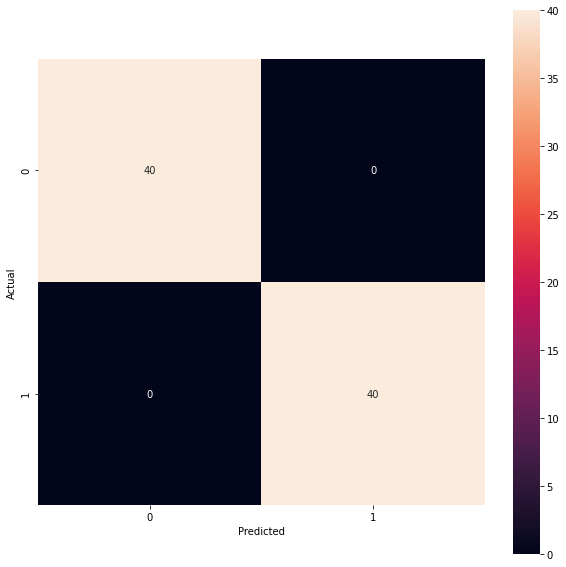

In [52]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_test, pred_mod2),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [51]:
print(metrics.classification_report(y_test, pred_mod2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Model 2 is the best